# Test online learning in DeepNets



In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
from time import time


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using Theano backend.
/Users/admin/.virtualenvs/keras_0_3_2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

('X_train original shape', (60000, 28, 28))
('y_train original shape', (60000,))


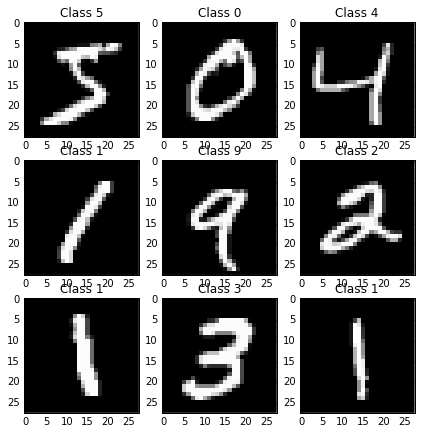

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

('Training matrix shape', (60000, 784))
('Testing matrix shape', (10000, 784))


In [6]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [9]:
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          show_accuracy=True, verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 7s - loss: 0.2499 - acc: 0.9258 - val_loss: 0.1106 - val_acc: 0.9641
Epoch 2/4
60000/60000 [==============================] - 7s - loss: 0.0991 - acc: 0.9697 - val_loss: 0.0754 - val_acc: 0.9763
Epoch 3/4
60000/60000 [==============================] - 7s - loss: 0.0702 - acc: 0.9777 - val_loss: 0.0761 - val_acc: 0.9769
Epoch 4/4
60000/60000 [==============================] - 8s - loss: 0.0554 - acc: 0.9821 - val_loss: 0.0674 - val_acc: 0.9795


In [10]:
score = model.evaluate(X_test, Y_test,
                       show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 0.067372666091844446)
('Test accuracy:', 0.97950000000000004)


In [11]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

10000/10000 [==============================] - 0s     


In [12]:
print len(correct_indices)

9795


In [13]:
print len(incorrect_indices)

205


## Lets go the online way !

In [14]:
model_online = Sequential()
model_online.add(Dense(512, input_shape=(784,)))
model_online.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model_online.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model_online.add(Dense(512))
model_online.add(Activation('relu'))
model_online.add(Dropout(0.2))
model_online.add(Dense(10))
model_online.add(Activation('softmax'))

In [15]:
model_online.compile(loss='categorical_crossentropy', optimizer='adam')

In [16]:
no_of_samples = len(X_train)

batch_size = 1
nb_classes = 10
nb_epoch = 1
start_time = 0
end_time = 0

In [17]:
for i in range(no_of_samples):
    # print info after consuming 1000 data points
    if ((i%1000 == 0) and (i>0)):
        print("Example : %d", i)
        end_time = time()
        time_lapse = end_time - start_time
        print("Training on 1000 point took %.2f secs" %(end_time - start_time))
        start_time = time()
        #start_time = time()

    # train on ith data point
    model_online.fit(X_train[i:i+1,:], Y_train[i:i+1],
          batch_size, nb_epoch,
          show_accuracy=True, verbose=0)

('Example : %d', 1000)
Training on 1000 point took 1461501658.67 secs
('Example : %d', 2000)
Training on 1000 point took 14.38 secs
('Example : %d', 3000)
Training on 1000 point took 17.64 secs
('Example : %d', 4000)
Training on 1000 point took 18.37 secs
('Example : %d', 5000)
Training on 1000 point took 19.21 secs
('Example : %d', 6000)
Training on 1000 point took 20.04 secs
('Example : %d', 7000)
Training on 1000 point took 20.75 secs
('Example : %d', 8000)
Training on 1000 point took 20.62 secs
('Example : %d', 9000)
Training on 1000 point took 21.22 secs
('Example : %d', 10000)
Training on 1000 point took 21.68 secs
('Example : %d', 11000)
Training on 1000 point took 21.96 secs
('Example : %d', 12000)
Training on 1000 point took 22.48 secs
('Example : %d', 13000)
Training on 1000 point took 22.66 secs
('Example : %d', 14000)
Training on 1000 point took 23.23 secs
('Example : %d', 15000)
Training on 1000 point took 22.83 secs
('Example : %d', 16000)
Training on 1000 point took 24.0

In [18]:
score = model_online.evaluate(X_test, Y_test,
                       show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 0.29842942390441896)
('Test accuracy:', 0.93969999999999998)


In [19]:
predicted_classes = model_online.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

10000/10000 [==============================] - 0s     


In [20]:
print len(correct_indices)

9397


In [21]:
print len(incorrect_indices)

603
